# 0. EDA

In [1]:
import pyarrow.parquet as pq
import pandas as pd
import duckdb
import polars as pl

file_path = "./data/parquet/2025-04.parquet"
dir_path = "./data/parquet/*"
train_seq_len = 3 

### 1. duckDB: 실제 서비스, 혹은 train pipeline에서 속도를 개선하기 위해선 duckDB가 필요할지도 모름.

In [2]:
con = duckdb.connect()
con.execute(f"""CREATE TABLE data AS SELECT * FROM '{file_path}'""")
con.execute(f"SELECT * FROM data limit 10").fetchall()

[('s856b0b83b6',
  's856b0b83b6',
  'desktop',
  2,
  'https://www.beusable.net/ko/',
  0,
  False,
  'Direct',
  '07mYi17Q',
  False,
  nan,
  True,
  False,
  0,
  False,
  '2025-04-01',
  '2025-04-01T00',
  0,
  1,
  nan,
  nan,
  nan,
  nan,
  nan,
  4930,
  -1,
  '',
  None,
  -1,
  1,
  None,
  0,
  0,
  0,
  'ko',
  80),
 ('s856b0b83b6',
  's856b0b83b6',
  'desktop',
  146,
  'https://www.beusable.net/ko/uxheatmap',
  0,
  False,
  'Direct',
  '2qVgJwlW',
  False,
  2872.0,
  False,
  True,
  0,
  False,
  '2025-04-01',
  '2025-04-01T00',
  0,
  1,
  nan,
  nan,
  nan,
  nan,
  nan,
  95149,
  -1,
  '',
  None,
  -1,
  3,
  None,
  0,
  493,
  0,
  'ko',
  97),
 ('s856b0b83b6',
  's856b0b83b6',
  'desktop',
  125,
  'https://www.beusable.net/signin',
  1,
  False,
  'https://www.beusable.net/ko/uxheatmap',
  '2qVgJwlW',
  False,
  1467.0,
  False,
  True,
  0,
  False,
  '2025-04-01',
  '2025-04-01T00',
  1,
  1,
  nan,
  nan,
  nan,
  nan,
  nan,
  95121,
  95149,
  'bd3432bd15

### 2. polars: 가볍게 쓰기엔 얘가 더 좋을 듯. 일단 도즈언

In [3]:
# read parquet file with polars
df_test = pl.read_parquet(file_path)

# sort by seq for group by by sequence order
df_test_sort = df_test.sort("seq")
df_test_sort.head(20)

sid,parentSid,device,urlId,url,seq,useless,fullReferStr,sessionId,uTurnPoint,interval,lastOrder,exist,reloadCount,rollback,dateStr,dateHourStr,parentSeq,initialReferId,srcId,termId,campId,contId,medId,gUrlId,prevNodeId,nodePath,exactNodePath,prevCustomId,beuCustomId,nodeCustomPath,beuCustomUserId,beuCustomUserIdForFiltering,loginStatusChange,firstPathname,sampleNumb
str,str,str,i64,str,i64,bool,str,str,bool,f64,bool,bool,i64,bool,str,str,i64,i64,f64,f64,f64,f64,f64,i64,i64,str,str,i64,i64,str,i64,i64,i64,str,i64
"""s856b0b83b6""","""s856b0b83b6""","""desktop""",2,"""https://www.beusable.net/ko/""",0,false,"""Direct""","""07mYi17Q""",false,NaN,true,false,0,false,"""2025-04-01""","""2025-04-01T00""",0,1,NaN,NaN,NaN,NaN,NaN,4930,-1,"""""",null,-1,1,null,0,0,0,"""ko""",80
"""s856b0b83b6""","""s856b0b83b6""","""desktop""",146,"""https://www.beusable.net/ko/ux…",0,false,"""Direct""","""2qVgJwlW""",false,2872.0,false,true,0,false,"""2025-04-01""","""2025-04-01T00""",0,1,NaN,NaN,NaN,NaN,NaN,95149,-1,"""""",null,-1,3,null,0,493,0,"""ko""",97
"""s856b0b83b6""","""s856b0b83b6""","""desktop""",125,"""https://www.beusable.net/signi…",0,false,"""Direct""","""bjzKSe6K""",false,NaN,true,false,0,false,"""2025-04-01""","""2025-04-01T00""",0,1,NaN,NaN,NaN,NaN,NaN,95121,-1,"""""",null,-1,0,null,0,0,0,"""signin""",19
"""s856b0b83b6""","""s856b0b83b6""","""desktop""",2,"""https://www.beusable.net/ko/""",0,false,"""Direct""","""d7hnpV2g""",false,NaN,true,false,0,false,"""2025-04-01""","""2025-04-01T00""",0,1,NaN,NaN,NaN,NaN,NaN,4930,-1,"""""",null,-1,1,null,0,0,0,"""ko""",76
"""s856b0b83b6""","""s856b0b83b6""","""desktop""",1,"""https://www.beusable.net/blog/…",0,false,"""https://www.google.com/""","""h0ugeryN""",false,NaN,true,false,0,false,"""2025-04-01""","""2025-04-01T00""",0,2,NaN,NaN,NaN,NaN,NaN,4989,-1,"""""",null,-1,0,null,0,0,0,"""blog""",62
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
"""s856b0b83b6""","""s856b0b83b6""","""desktop""",1,"""https://www.beusable.net/blog/…",0,false,"""https://search.naver.com/searc…","""Nc9tVkco""",false,NaN,true,false,0,false,"""2025-04-01""","""2025-04-01T00""",0,2628,NaN,NaN,NaN,NaN,NaN,4989,-1,"""""",null,-1,0,null,0,0,0,"""blog""",19
"""s856b0b83b6""","""s856b0b83b6""","""desktop""",125,"""https://www.beusable.net/signi…",0,false,"""https://analytics.beusable.net…","""nOtPZSMJ""",false,8687.0,false,false,0,false,"""2025-04-01""","""2025-04-01T00""",0,409,NaN,NaN,NaN,NaN,NaN,95121,-1,"""""",null,-1,0,null,0,222,0,"""signin""",79
"""s856b0b83b6""","""s856b0b83b6""","""desktop""",1,"""https://www.beusable.net/blog/…",0,false,"""https://www.google.com/""","""oBScwuWD""",false,NaN,true,false,0,false,"""2025-04-01""","""2025-04-01T00""",0,2,NaN,NaN,NaN,NaN,NaN,4989,-1,"""""",null,-1,0,null,0,0,0,"""blog""",24


In [4]:
# get data of 1 year!

from glob import glob

filenames = glob(dir_path)
common_columns = ['sid', 'parentSid', 'device', 'urlId', 'url', 'seq', 'useless', 'fullReferStr', 'sessionId', 'uTurnPoint', 'interval', 'lastOrder', 'exist', 'reloadCount', 'rollback', 'dateStr', 'dateHourStr', 'parentSeq', 'initialReferId', 'gUrlId', 'prevNodeId', 'nodePath']
for enum, filename in enumerate(filenames):
    if enum == 0:
        df = pl.read_parquet(filename, columns=common_columns)
    else:
        df_under = pl.read_parquet(filename, columns=common_columns)
        df = pl.concat([df, df_under], how="vertical")

df

sid,parentSid,device,urlId,url,seq,useless,fullReferStr,sessionId,uTurnPoint,interval,lastOrder,exist,reloadCount,rollback,dateStr,dateHourStr,parentSeq,initialReferId,gUrlId,prevNodeId,nodePath
str,str,str,i64,str,i64,bool,str,str,bool,f64,bool,bool,i64,bool,str,str,i64,i64,i64,i64,str
"""s856b0b83b6""","""s856b0b83b6""","""phone""",1,"""https://www.beusable.net/blog/…",0,false,"""https://www.google.com/""","""w1SrJUUb""",false,NaN,true,true,0,false,"""2024-10-01""","""2024-10-01T00""",0,2,4989,-1,""""""
"""s856b0b83b6""","""s856b0b83b6""","""phone""",13,"""https://www.beusable.net/en/""",0,false,"""https://www.google.com/""","""ZuGIxkf8""",false,NaN,true,false,0,false,"""2024-10-01""","""2024-10-01T00""",0,2,4986,-1,""""""
"""s514a626c39""","""s856b0b83b6""","""desktop""",4,"""https://tool.beusable.net/dash…",1,false,"""https://www.beusable.net/my""","""1VNYTFN4""",false,78605.0,false,false,0,false,"""2024-10-01""","""2024-10-01T00""",4,1,107630,95123,"""416092b9f0"""
"""s514a626c39""","""s856b0b83b6""","""desktop""",32,"""https://tool.beusable.net/user…",2,false,"""https://tool.beusable.net/dash…","""1VNYTFN4""",false,52116.0,false,false,0,false,"""2024-10-01""","""2024-10-01T00""",5,1,107663,107630,"""c99e1ae00b"""
"""s514a626c39""","""s856b0b83b6""","""desktop""",50,"""https://tool.beusable.net/user…",3,false,"""https://tool.beusable.net/user…","""1VNYTFN4""",false,546.0,false,false,0,false,"""2024-10-01""","""2024-10-01T00""",6,1,107683,107663,"""c1aec9d5d9"""
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
"""s26d51d1895""","""s856b0b83b6""","""phone""",2715,"""https://forum.beusable.net/ko/…",0,false,"""https://www.google.co.kr/""","""QoPprvUy""",false,NaN,true,false,0,false,"""2024-05-31""","""2024-05-31T23""",0,4,169335,-1,""""""
"""s856b0b83b6""","""s856b0b83b6""","""phone""",149,"""https://www.beusable.net/ko/wh…",1,true,"""https://solomon.beusable.net/b…","""z5nuUBpY""",true,22.0,false,false,0,false,"""2024-05-31""","""2024-05-31T23""",2,124,95162,171992,"""1985997f43"""
"""s856b0b83b6""","""s856b0b83b6""","""phone""",2,"""https://www.beusable.net/ko/""",0,false,"""https://m.search.naver.com/""","""z5nuUBpY""",false,556.0,false,false,0,false,"""2024-05-31""","""2024-05-31T23""",0,124,4930,-1,""""""


In [5]:
# 1. seq stat
print(f"""
    시퀀스 평균: {df['parentSeq'].mean()},
    시퀀스 중앙값: {df['parentSeq'].median()},
    시퀀스 최대값: {df['parentSeq'].max()},
    시퀀스 최소값: {df['parentSeq'].min()},
    시퀀스 분산: {df['parentSeq'].var()},
    시퀀스 표준편차: {df['parentSeq'].std()}

    시퀀스 describe: {df['parentSeq'].describe()}
""")


    시퀀스 평균: 9.529723531399203,
    시퀀스 중앙값: 2.0,
    시퀀스 최대값: 1303,
    시퀀스 최소값: 0,
    시퀀스 분산: 1145.5088706461431,
    시퀀스 표준편차: 33.84536704847715

    시퀀스 describe: shape: (9, 2)
┌────────────┬────────────┐
│ statistic  ┆ value      │
│ ---        ┆ ---        │
│ str        ┆ f64        │
╞════════════╪════════════╡
│ count      ┆ 1.172068e6 │
│ null_count ┆ 0.0        │
│ mean       ┆ 9.529724   │
│ std        ┆ 33.845367  │
│ min        ┆ 0.0        │
│ 25%        ┆ 0.0        │
│ 50%        ┆ 2.0        │
│ 75%        ┆ 8.0        │
│ max        ┆ 1303.0     │
└────────────┴────────────┘



In [6]:
df.filter(pl.col("sessionId")=="jakPuFPx")

sid,parentSid,device,urlId,url,seq,useless,fullReferStr,sessionId,uTurnPoint,interval,lastOrder,exist,reloadCount,rollback,dateStr,dateHourStr,parentSeq,initialReferId,gUrlId,prevNodeId,nodePath
str,str,str,i64,str,i64,bool,str,str,bool,f64,bool,bool,i64,bool,str,str,i64,i64,i64,i64,str
"""s514a626c39""","""s856b0b83b6""","""desktop""",4,"""https://tool.beusable.net/dash…",0,false,"""https://www.beusable.net/""","""jakPuFPx""",false,5268.0,false,true,0,false,"""2025-04-08""","""2025-04-08T16""",0,19,107630,-1,""""""
"""s514a626c39""","""s856b0b83b6""","""desktop""",82376,"""https://tool.beusable.net/repo…",1,false,"""https://tool.beusable.net/dash…","""jakPuFPx""",false,NaN,true,true,0,false,"""2025-04-08""","""2025-04-08T16""",1,19,203220,107630,"""b3ecf4b012"""
"""s856b0b83b6""","""s856b0b83b6""","""desktop""",125,"""https://www.beusable.net/signi…",2,false,"""https://tool.beusable.net/dash…","""jakPuFPx""",false,735.0,false,true,0,false,"""2025-04-10""","""2025-04-10T11""",2,3,95121,-1,""""""
"""s856b0b83b6""","""s856b0b83b6""","""desktop""",127,"""https://www.beusable.net/my""",3,false,"""https://www.beusable.net/signi…","""jakPuFPx""",false,2008.0,false,true,0,false,"""2025-04-10""","""2025-04-10T11""",3,3,95123,95121,"""5d18e7a4b4"""
"""s514a626c39""","""s856b0b83b6""","""desktop""",4,"""https://tool.beusable.net/dash…",1,false,"""https://www.beusable.net/my""","""jakPuFPx""",false,13532.0,false,true,0,false,"""2025-04-10""","""2025-04-10T11""",4,19,107630,95123,"""95d2ebe4ff"""
"""s26d51d1895""","""s856b0b83b6""","""desktop""",4294,"""https://forum.beusable.net/ko/…",1,false,"""https://tool.beusable.net/dash…","""jakPuFPx""",false,75645.0,false,true,0,false,"""2025-04-10""","""2025-04-10T11""",5,3,203904,107630,"""bfae449377"""
"""s514a626c39""","""s856b0b83b6""","""desktop""",4,"""https://tool.beusable.net/dash…",2,false,"""https://forum.beusable.net/ko/…","""jakPuFPx""",false,257737.0,false,true,0,false,"""2025-04-10""","""2025-04-10T11""",6,19,107630,203904,"""75ebacccfc"""
"""s26d51d1895""","""s856b0b83b6""","""desktop""",4288,"""https://forum.beusable.net/ko/…",2,false,"""https://tool.beusable.net/dash…","""jakPuFPx""",false,13871.0,false,true,0,false,"""2025-04-10""","""2025-04-10T11""",7,3,203738,107630,"""ed6de0841e"""
"""s514a626c39""","""s856b0b83b6""","""desktop""",4,"""https://tool.beusable.net/dash…",3,false,"""https://forum.beusable.net/ko/…","""jakPuFPx""",false,7343.0,false,true,0,false,"""2025-04-10""","""2025-04-10T11""",8,19,107630,203738,"""de290eb9b2"""


In [7]:
# 2. sid, gURL ID 갯수
# TODO@jaehoon: why is sessionId less than lastOrder == True?
sid_cnt = len(df['sessionId'].unique())
gurl_id_cnt = len(df['gUrlId'].arg_unique())
print(f"""
    총 row 수: 1253153,
    sessionId 갯수: {sid_cnt},
    gUrlId 갯수: {gurl_id_cnt}
""")


    총 row 수: 1253153,
    sessionId 갯수: 323848,
    gUrlId 갯수: 45664



In [8]:
# 3. rollback Ratio
rollback_false = list()
rollback_true = list()
for value in df["rollback"]:
    if value == True: rollback_true.append(value)
    else: rollback_false.append(value)

print(f"""
    rollback true/false count:
    {df["rollback"].value_counts()},

    rollback ratio(%)
    false: {len(rollback_false)/len(df["rollback"]) * 100}
    true: {len(rollback_true)/len(df["rollback"]) * 100}

    describe: {df['rollback'].describe()}
""")


    rollback true/false count:
    shape: (2, 2)
┌──────────┬─────────┐
│ rollback ┆ count   │
│ ---      ┆ ---     │
│ bool     ┆ u32     │
╞══════════╪═════════╡
│ false    ┆ 1145442 │
│ true     ┆ 26626   │
└──────────┴─────────┘,

    rollback ratio(%)
    false: 97.72828880235618
    true: 2.271711197643823

    describe: shape: (5, 2)
┌────────────┬────────────┐
│ statistic  ┆ value      │
│ ---        ┆ ---        │
│ str        ┆ f64        │
╞════════════╪════════════╡
│ count      ┆ 1.172068e6 │
│ null_count ┆ 0.0        │
│ mean       ┆ 0.022717   │
│ min        ┆ 0.0        │
│ max        ┆ 1.0        │
└────────────┴────────────┘



In [9]:
# 4. lastOrder Ratio
lo_false = list()
lo_true = list()
for value in df["lastOrder"]:
    if value == True: lo_true.append(value)
    else: lo_false.append(value)

print(f"""
    lastOrder true/false count:
    {df["lastOrder"].value_counts()},

    lastOrder ratio(%)
    false: {len(lo_false)/len(df["lastOrder"]) * 100}
    true: {len(lo_true)/len(df["lastOrder"]) * 100}

    describe: {df['lastOrder'].describe()}
""")


    lastOrder true/false count:
    shape: (2, 2)
┌───────────┬────────┐
│ lastOrder ┆ count  │
│ ---       ┆ ---    │
│ bool      ┆ u32    │
╞═══════════╪════════╡
│ false     ┆ 825697 │
│ true      ┆ 346371 │
└───────────┴────────┘,

    lastOrder ratio(%)
    false: 70.44787503796708
    true: 29.55212496203292

    describe: shape: (5, 2)
┌────────────┬────────────┐
│ statistic  ┆ value      │
│ ---        ┆ ---        │
│ str        ┆ f64        │
╞════════════╪════════════╡
│ count      ┆ 1.172068e6 │
│ null_count ┆ 0.0        │
│ mean       ┆ 0.295521   │
│ min        ┆ 0.0        │
│ max        ┆ 1.0        │
└────────────┴────────────┘



In [10]:
# 5. lastOrder count by device
true_desktop = len(df.filter((pl.col("lastOrder") == True) & (pl.col("device") == "desktop")))
false_desktop = len(df.filter((pl.col("lastOrder") == False) & (pl.col("device") == "desktop")))
true_tablet = len(df.filter((pl.col("lastOrder") == True) & (pl.col("device") == "tablet")))
false_tablet = len(df.filter((pl.col("lastOrder") == False) & (pl.col("device") == "tablet")))
true_phone = len(df.filter((pl.col("lastOrder") == True) & (pl.col("device") == "phone")))
false_phone = len(df.filter((pl.col("lastOrder") == False) & (pl.col("device") == "phone")))

print(f"""
    Desktop True: {true_desktop} --> y label data row,
    Desktop False: {false_desktop},
    Desktop Sum: {true_desktop+false_desktop}
    ===============================
    Tablet True: {true_tablet} --> y label data row,
    Tablet False: {false_tablet},
    Tablet Sum: {true_tablet+false_tablet}
    ===============================
    Phone True: {true_phone} --> y label data row,
    Phone False: {false_phone},
    Phone Sum: {true_phone + false_phone}
""")


    Desktop True: 313888 --> y label data row,
    Desktop False: 811721,
    Desktop Sum: 1125609
    Tablet True: 1802 --> y label data row,
    Tablet False: 1281,
    Tablet Sum: 3083
    Phone True: 30681 --> y label data row,
    Phone False: 12695,
    Phone Sum: 43376



/var/folders/ny/r6ly78jj0kq25dqyvjltjqq00000gn/T/ipykernel_59095/2273399800.py:5: DeprecationWarning: The argument `columns` for `DataFrame.pivot` is deprecated. It has been renamed to `on`.
  .pivot(index=feature, columns="lastOrder", values="len", aggregate_function="sum")


<Axes: xlabel='device', ylabel='count'>

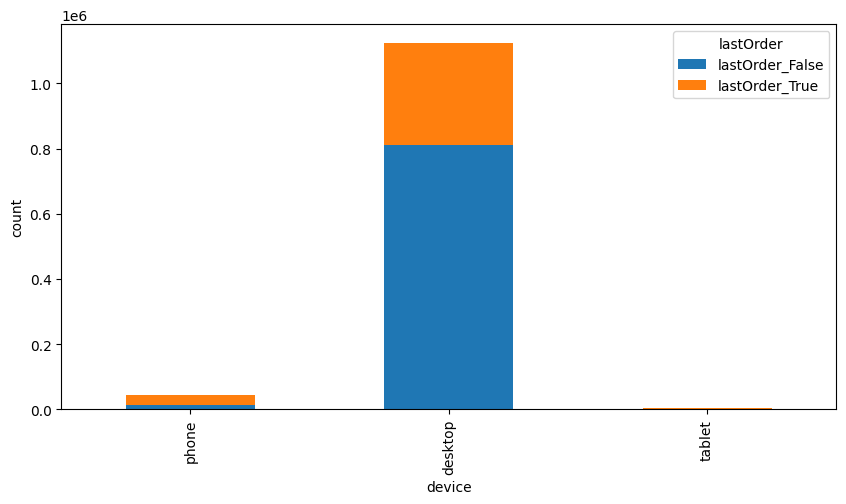

In [11]:
def bar_plot(df, feature):
    counts = (
        df.group_by([feature, "lastOrder"])  # group by feature and label
          .len()                               # count rows per group -> column "len"
          .pivot(index=feature, columns="lastOrder", values="len", aggregate_function="sum")
          .fill_null(0)
    )
    pdf = counts.to_pandas().set_index(feature)

    # Normalize column names and guarantee both columns exist
    rename_map = {
        "true": "lastOrder_True",
        "false": "lastOrder_False",
        "true": "lastOrder_True",
        "false": "lastOrder_False",
        "true": "lastOrder_True",
        "false": "lastOrder_False",
    }
    pdf = pdf.rename(columns=rename_map)
    for col in ["lastOrder_True", "lastOrder_False"]:
        if col not in pdf.columns:
            pdf[col] = 0

    ax = pdf[["lastOrder_False", "lastOrder_True"]].plot(kind="bar", stacked=True, figsize=(10, 5))
    ax.set_ylabel("count")
    ax.set_xlabel(feature)
    ax.legend(title="lastOrder")
    return ax

bar_plot(df, "device")

In [12]:
# 정규성 평가
from scipy.stats import zscore, normaltest, probplot
seq = df["parentSeq"]
data_z = zscore(seq)
p = normaltest(seq)
is_normality = True if p.pvalue >= 0.95 else False
statistic_or_dl = "XGBoost, Transformer" if not is_normality else "Linear Analysis such as 'Logistic Regression'"

print(f"""
    statistic: {p.statistic},
    pvalue: {p.pvalue},
    normality: {is_normality},
    learning: {statistic_or_dl}
""")

# sampling 불가 -> 통계 기반 모델 사용 불가
# 비선형모델인 XGBoost, Transformer가 적합!


    statistic: 2487220.9189759092,
    pvalue: 0.0,
    normality: False,
    learning: XGBoost, Transformer



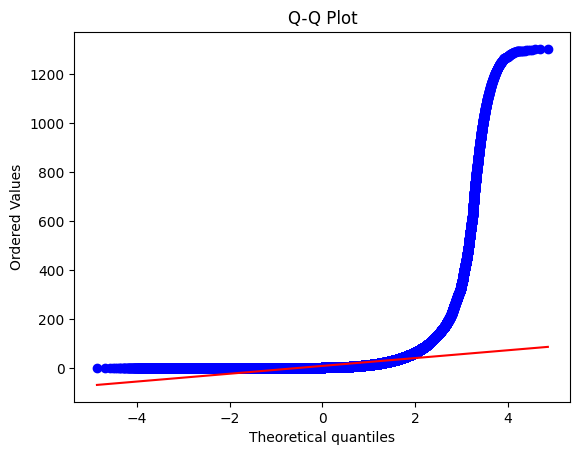

In [13]:
import matplotlib.pyplot as plt

probplot(seq, dist="norm", plot=plt)
plt.title("Q-Q Plot")
plt.show()

# 1. X, y dataset

In [15]:
# y 데이터로 sessionId를 가져오고 이에 맞는 X 데이터를 붙여주는 방식으로 가자
# 조건:
# 1. seq는 4 이상 -> 그런데, parentSeq는 4인데, parentSeq가 순서대로 다 들어있지 않은 케이스들도 있음. 얜 추후에 길이 체크 후 날려주는 것으로 한다.
# 2. 중복된 세션은 지워준다. 의도하지 않은 형태의 데이터임

session_df = df.filter((pl.col("lastOrder") == True) & (pl.col("parentSeq") >= 4))
session_df

sid,parentSid,device,urlId,url,seq,useless,fullReferStr,sessionId,uTurnPoint,interval,lastOrder,exist,reloadCount,rollback,dateStr,dateHourStr,parentSeq,initialReferId,gUrlId,prevNodeId,nodePath
str,str,str,i64,str,i64,bool,str,str,bool,f64,bool,bool,i64,bool,str,str,i64,i64,i64,i64,str
"""s514a626c39""","""s856b0b83b6""","""desktop""",31,"""https://tool.beusable.net/user…",4,false,"""https://tool.beusable.net/user…","""1VNYTFN4""",false,NaN,true,false,0,false,"""2024-10-01""","""2024-10-01T00""",7,1,107662,107683,"""4e3552464c"""
"""s26d51d1895""","""s856b0b83b6""","""desktop""",31,"""https://forum.beusable.net/ko/…",4,false,"""https://forum.beusable.net/ko/…","""JiuOBNy2""",false,NaN,true,false,0,false,"""2024-10-01""","""2024-10-01T01""",4,2628,114068,160328,"""efc783d8bd"""
"""s514a626c39""","""s856b0b83b6""","""desktop""",4,"""https://tool.beusable.net/dash…",11,false,"""https://tool.beusable.net/dash…","""Q48Tbq4H""",false,NaN,true,false,7,false,"""2024-10-01""","""2024-10-01T01""",16,1,107630,107663,"""50aa39282e"""
"""s514a626c39""","""s856b0b83b6""","""desktop""",32,"""https://tool.beusable.net/user…",15,false,"""https://tool.beusable.net/repo…","""EwXO3o4T""",false,NaN,true,true,0,false,"""2024-10-01""","""2024-10-01T02""",15,19,107663,187646,"""74aabf0332"""
"""s514a626c39""","""s856b0b83b6""","""desktop""",69883,"""https://tool.beusable.net/repo…",4,false,"""https://tool.beusable.net/dash…","""Opx2lkbg""",false,NaN,true,false,0,false,"""2024-10-01""","""2024-10-01T02""",6,148,187648,107630,"""892d5aa8ed"""
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
"""s4bc12662fc""","""s856b0b83b6""","""desktop""",5,"""https://solomon.beusable.net/b…",2,false,"""https://www.beusable.net/signi…","""aXDKcrNy""",false,NaN,true,true,0,false,"""2024-05-31""","""2024-05-31T23""",4,1,171992,95121,"""583b333c0a"""
"""s4bc12662fc""","""s856b0b83b6""","""desktop""",5,"""https://solomon.beusable.net/b…",1,false,"""https://tool.beusable.net/repo…","""D8nN0Kl2""",false,NaN,true,true,0,false,"""2024-05-31""","""2024-05-31T23""",13,1,171992,145503,"""5dfe99c272"""
"""s26d51d1895""","""s856b0b83b6""","""desktop""",132,"""https://forum.beusable.net/en/…",2,false,"""https://forum.beusable.net/en/…","""FENyROrN""",false,NaN,true,true,0,false,"""2024-05-31""","""2024-05-31T23""",4,1,114343,114342,"""470b1994bd"""


In [16]:
session_df.filter(pl.col("sessionId") == "iZQaSyXL").sort("parentSeq")

sid,parentSid,device,urlId,url,seq,useless,fullReferStr,sessionId,uTurnPoint,interval,lastOrder,exist,reloadCount,rollback,dateStr,dateHourStr,parentSeq,initialReferId,gUrlId,prevNodeId,nodePath
str,str,str,i64,str,i64,bool,str,str,bool,f64,bool,bool,i64,bool,str,str,i64,i64,i64,i64,str
"""s514a626c39""","""s856b0b83b6""","""desktop""",32,"""https://tool.beusable.net/user…",3,false,"""https://tool.beusable.net/repo…","""iZQaSyXL""",false,NaN,true,true,0,false,"""2024-10-01""","""2024-10-01T09""",6,2,107663,109565,"""e237a97a99"""


In [17]:
not_session_df = session_df.filter(pl.len().over("sessionId") == 2).sort("sessionId")
not_session_df.filter(pl.col("sessionId") == "01V4JKo2")

sid,parentSid,device,urlId,url,seq,useless,fullReferStr,sessionId,uTurnPoint,interval,lastOrder,exist,reloadCount,rollback,dateStr,dateHourStr,parentSeq,initialReferId,gUrlId,prevNodeId,nodePath
str,str,str,i64,str,i64,bool,str,str,bool,f64,bool,bool,i64,bool,str,str,i64,i64,i64,i64,str


In [18]:
session_df = session_df.filter(pl.len().over("sessionId") == 1).sort("sessionId")
session_df

sid,parentSid,device,urlId,url,seq,useless,fullReferStr,sessionId,uTurnPoint,interval,lastOrder,exist,reloadCount,rollback,dateStr,dateHourStr,parentSeq,initialReferId,gUrlId,prevNodeId,nodePath
str,str,str,i64,str,i64,bool,str,str,bool,f64,bool,bool,i64,bool,str,str,i64,i64,i64,i64,str
"""s856b0b83b6""","""s856b0b83b6""","""desktop""",2,"""https://www.beusable.net/ko/""",3,false,"""https://tool.beusable.net/user…","""006JtXoj""",false,NaN,true,true,0,false,"""2025-01-07""","""2025-01-07T22""",7,1,4930,107683,"""cc20b2d91b"""
"""s667eb8ffd7""","""s856b0b83b6""","""desktop""",1,"""https://analytics.beusable.net…",3,false,"""https://analytics.beusable.net…","""0094VTgv""",false,NaN,true,true,0,false,"""2024-12-13""","""2024-12-13T10""",6,2,107632,107764,"""968c352f49"""
"""s667eb8ffd7""","""s856b0b83b6""","""desktop""",1,"""https://analytics.beusable.net…",5,false,"""https://analytics.beusable.net…","""009RZOGn""",false,NaN,true,true,0,false,"""2024-06-13""","""2024-06-13T12""",8,2,107632,107668,"""00dd29f7cf"""
"""s514a626c39""","""s856b0b83b6""","""desktop""",67192,"""https://tool.beusable.net/repo…",6,false,"""https://tool.beusable.net/dash…","""00E2R2Ph""",false,NaN,true,true,0,false,"""2024-10-25""","""2024-10-25T11""",9,1,184026,107630,"""cd3196eac8"""
"""s514a626c39""","""s856b0b83b6""","""desktop""",508,"""https://tool.beusable.net/repo…",3,false,"""https://tool.beusable.net/repo…","""00KVI1V8""",false,NaN,true,false,0,false,"""2024-11-25""","""2024-11-25T10""",4,148,108160,108157,"""b19bdfc99e"""
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
"""s26d51d1895""","""s856b0b83b6""","""desktop""",4274,"""https://forum.beusable.net/ko/…",3,false,"""https://www.beusable.net/ko/ux…","""zzixRnRt""",false,NaN,true,true,0,false,"""2025-04-02""","""2025-04-02T18""",4,1,203190,95149,"""2129cb5c22"""
"""s667eb8ffd7""","""s856b0b83b6""","""desktop""",7,"""https://analytics.beusable.net…",2,false,"""https://analytics.beusable.net…","""zzl2SjBI""",false,NaN,true,true,0,false,"""2024-11-27""","""2024-11-27T14""",5,2,107677,107632,"""9ecaa494cd"""
"""s514a626c39""","""s856b0b83b6""","""desktop""",70642,"""https://tool.beusable.net/repo…",6,false,"""https://tool.beusable.net/dash…","""zzmJfQFw""",false,NaN,true,false,0,false,"""2024-10-22""","""2024-10-22T19""",10,2,188579,107630,"""4a7dda3c8a"""


In [19]:
session_df["sessionId"].unique()

sessionId
str
"""uebnmCRw"""
"""crQjTV3j"""
"""kRCUdyVK"""
"""GZfMyfOe"""
"""M4lndIEm"""
…
"""ZPCNsfLJ"""
"""MpOtCG84"""
"""Xxfvn6bc"""


In [20]:
raw_data_set = df.join(
    session_df.select("sessionId").unique(),
    on="sessionId",
    how="semi",
)
raw_data_set

sid,parentSid,device,urlId,url,seq,useless,fullReferStr,sessionId,uTurnPoint,interval,lastOrder,exist,reloadCount,rollback,dateStr,dateHourStr,parentSeq,initialReferId,gUrlId,prevNodeId,nodePath
str,str,str,i64,str,i64,bool,str,str,bool,f64,bool,bool,i64,bool,str,str,i64,i64,i64,i64,str
"""s514a626c39""","""s856b0b83b6""","""desktop""",4,"""https://tool.beusable.net/dash…",1,false,"""https://www.beusable.net/my""","""1VNYTFN4""",false,78605.0,false,false,0,false,"""2024-10-01""","""2024-10-01T00""",4,1,107630,95123,"""416092b9f0"""
"""s514a626c39""","""s856b0b83b6""","""desktop""",32,"""https://tool.beusable.net/user…",2,false,"""https://tool.beusable.net/dash…","""1VNYTFN4""",false,52116.0,false,false,0,false,"""2024-10-01""","""2024-10-01T00""",5,1,107663,107630,"""c99e1ae00b"""
"""s514a626c39""","""s856b0b83b6""","""desktop""",50,"""https://tool.beusable.net/user…",3,false,"""https://tool.beusable.net/user…","""1VNYTFN4""",false,546.0,false,false,0,false,"""2024-10-01""","""2024-10-01T00""",6,1,107683,107663,"""c1aec9d5d9"""
"""s514a626c39""","""s856b0b83b6""","""desktop""",31,"""https://tool.beusable.net/user…",4,false,"""https://tool.beusable.net/user…","""1VNYTFN4""",false,NaN,true,false,0,false,"""2024-10-01""","""2024-10-01T00""",7,1,107662,107683,"""4e3552464c"""
"""s856b0b83b6""","""s856b0b83b6""","""desktop""",2,"""https://www.beusable.net/ko/""",0,false,"""Direct""","""1VNYTFN4""",false,1368.0,false,false,0,false,"""2024-10-01""","""2024-10-01T00""",0,1,4930,-1,""""""
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
"""s26d51d1895""","""s856b0b83b6""","""desktop""",131,"""https://forum.beusable.net/en/…",1,false,"""https://forum.beusable.net/en/…","""FENyROrN""",false,1.0,false,true,0,true,"""2024-05-31""","""2024-05-31T23""",3,1,114342,173341,"""0cf09f5a25"""
"""s26d51d1895""","""s856b0b83b6""","""desktop""",131,"""https://forum.beusable.net/en/…",1,false,"""https://forum.beusable.net/en/…","""FENyROrN""",false,97783.0,false,true,1,false,"""2024-05-31""","""2024-05-31T23""",3,1,114342,173341,"""0cf09f5a25"""
"""s26d51d1895""","""s856b0b83b6""","""desktop""",128,"""https://forum.beusable.net/en/…",2,true,"""https://forum.beusable.net/en/…","""FENyROrN""",true,108364.0,false,true,0,false,"""2024-05-31""","""2024-05-31T23""",4,1,114339,114342,"""470b1994bd"""


In [21]:
raw_data_set.filter(pl.col("sessionId") == "1VNYTFN4").sort("parentSeq")

sid,parentSid,device,urlId,url,seq,useless,fullReferStr,sessionId,uTurnPoint,interval,lastOrder,exist,reloadCount,rollback,dateStr,dateHourStr,parentSeq,initialReferId,gUrlId,prevNodeId,nodePath
str,str,str,i64,str,i64,bool,str,str,bool,f64,bool,bool,i64,bool,str,str,i64,i64,i64,i64,str
"""s856b0b83b6""","""s856b0b83b6""","""desktop""",2,"""https://www.beusable.net/ko/""",0,false,"""Direct""","""1VNYTFN4""",false,1368.0,false,false,0,false,"""2024-10-01""","""2024-10-01T00""",0,1,4930,-1,""""""
"""s856b0b83b6""","""s856b0b83b6""","""desktop""",125,"""https://www.beusable.net/signi…",1,false,"""https://www.beusable.net/ko/""","""1VNYTFN4""",false,14792.0,false,false,0,false,"""2024-10-01""","""2024-10-01T00""",1,1,95121,4930,"""637e15cea9"""
"""s856b0b83b6""","""s856b0b83b6""","""desktop""",125,"""https://www.beusable.net/signi…",2,false,"""https://www.beusable.net/signi…","""1VNYTFN4""",false,295.0,false,false,0,false,"""2024-10-01""","""2024-10-01T00""",2,1,95121,95121,"""8a661ea871"""
"""s856b0b83b6""","""s856b0b83b6""","""desktop""",127,"""https://www.beusable.net/my""",3,false,"""https://www.beusable.net/signi…","""1VNYTFN4""",false,1688.0,false,false,0,false,"""2024-10-01""","""2024-10-01T00""",3,1,95123,95121,"""7d6e633c49"""
"""s514a626c39""","""s856b0b83b6""","""desktop""",4,"""https://tool.beusable.net/dash…",1,false,"""https://www.beusable.net/my""","""1VNYTFN4""",false,78605.0,false,false,0,false,"""2024-10-01""","""2024-10-01T00""",4,1,107630,95123,"""416092b9f0"""
"""s514a626c39""","""s856b0b83b6""","""desktop""",32,"""https://tool.beusable.net/user…",2,false,"""https://tool.beusable.net/dash…","""1VNYTFN4""",false,52116.0,false,false,0,false,"""2024-10-01""","""2024-10-01T00""",5,1,107663,107630,"""c99e1ae00b"""
"""s514a626c39""","""s856b0b83b6""","""desktop""",50,"""https://tool.beusable.net/user…",3,false,"""https://tool.beusable.net/user…","""1VNYTFN4""",false,546.0,false,false,0,false,"""2024-10-01""","""2024-10-01T00""",6,1,107683,107663,"""c1aec9d5d9"""
"""s514a626c39""","""s856b0b83b6""","""desktop""",31,"""https://tool.beusable.net/user…",4,false,"""https://tool.beusable.net/user…","""1VNYTFN4""",false,NaN,true,false,0,false,"""2024-10-01""","""2024-10-01T00""",7,1,107662,107683,"""4e3552464c"""


In [22]:
raw_data = (
    raw_data_set.group_by("sessionId")
    .agg(
        # input
        pl.col("urlId").alias("urlId"),
        pl.col("reloadCount").alias("reloadCount"),
        pl.col("exist").alias("exist"),
        pl.col("rollback").alias("rollback"),
        pl.col("uTurnPoint").alias("uTurnPoint"),
        pl.col("lastOrder").alias("lastOrder"),

        # broadcast context
        pl.first("device").alias("device"),
        pl.first("initialReferId").alias("initialReferId")
    )
).sort("sessionId")
raw_data

sessionId,urlId,reloadCount,exist,rollback,uTurnPoint,lastOrder,device,initialReferId
str,list[i64],list[i64],list[bool],list[bool],list[bool],list[bool],str,i64
"""006JtXoj""","[2, 2, … 50]","[0, 0, … 0]","[true, true, … true]","[false, false, … false]","[false, false, … false]","[false, true, … false]","""desktop""",1
"""0094VTgv""","[1, 8, … 127]","[0, 0, … 0]","[true, true, … true]","[false, false, … false]","[false, false, … false]","[false, false, … false]","""desktop""",2
"""009RZOGn""","[4, 1, … 127]","[0, 0, … 0]","[true, true, … true]","[false, false, … false]","[false, false, … false]","[false, false, … false]","""desktop""",2
"""00E2R2Ph""","[1, 98, … 127]","[0, 0, … 0]","[true, true, … true]","[false, false, … false]","[false, false, … false]","[false, false, … false]","""desktop""",1
"""00KVI1V8""","[4, 505, … 127]","[0, 0, … 0]","[false, false, … false]","[false, false, … false]","[false, false, … false]","[false, false, … false]","""desktop""",148
…,…,…,…,…,…,…,…,…
"""zzixRnRt""","[146, 2459, … 4274]","[0, 0, … 0]","[true, true, … true]","[false, false, … false]","[false, false, … false]","[false, false, … true]","""desktop""",1
"""zzl2SjBI""","[1, 7, … 127]","[0, 0, … 0]","[true, true, … true]","[false, false, … false]","[false, false, … false]","[false, true, … false]","""desktop""",2
"""zzmJfQFw""","[13, 1, … 127]","[0, 0, … 0]","[false, false, … false]","[false, false, … false]","[false, false, … false]","[false, false, … false]","""desktop""",2


In [27]:
df = raw_data.with_columns(pl.col("urlId").list.len().alias("seqLength"))

rows_to_drop = (
    df.with_row_index("row_nr")
      .filter(pl.col("seqLength") <= 3)
      .get_column("row_nr")
      .to_list()
)
print(len(rows_to_drop))

463


In [26]:
df_seq_over_3 = (
    df.with_row_index("row_nr")
      .filter(~pl.col("row_nr").is_in(rows_to_drop))
      .drop("row_nr")
)
df_seq_over_3

sessionId,urlId,reloadCount,exist,rollback,uTurnPoint,lastOrder,device,initialReferId,seqLength
str,list[i64],list[i64],list[bool],list[bool],list[bool],list[bool],str,i64,u32
"""006JtXoj""","[2, 2, … 50]","[0, 0, … 0]","[true, true, … true]","[false, false, … false]","[false, false, … false]","[false, true, … false]","""desktop""",1,9
"""0094VTgv""","[1, 8, … 127]","[0, 0, … 0]","[true, true, … true]","[false, false, … false]","[false, false, … false]","[false, false, … false]","""desktop""",2,7
"""009RZOGn""","[4, 1, … 127]","[0, 0, … 0]","[true, true, … true]","[false, false, … false]","[false, false, … false]","[false, false, … false]","""desktop""",2,10
"""00E2R2Ph""","[1, 98, … 127]","[0, 0, … 0]","[true, true, … true]","[false, false, … false]","[false, false, … false]","[false, false, … false]","""desktop""",1,10
"""00KVI1V8""","[4, 505, … 127]","[0, 0, … 0]","[false, false, … false]","[false, false, … false]","[false, false, … false]","[false, false, … false]","""desktop""",148,5
…,…,…,…,…,…,…,…,…,…
"""zzixRnRt""","[146, 2459, … 4274]","[0, 0, … 0]","[true, true, … true]","[false, false, … false]","[false, false, … false]","[false, false, … true]","""desktop""",1,5
"""zzl2SjBI""","[1, 7, … 127]","[0, 0, … 0]","[true, true, … true]","[false, false, … false]","[false, false, … false]","[false, true, … false]","""desktop""",2,6
"""zzmJfQFw""","[13, 1, … 127]","[0, 0, … 0]","[false, false, … false]","[false, false, … false]","[false, false, … false]","[false, false, … false]","""desktop""",2,12


In [ ]:
# 이제 stride로 정해진 시퀀스 길이에 맞게 row와 y라벨을 뽑아야한다.

# 2. Model

In [ ]:
# model.py
import torch.nn as nn

class SimpleTransformer(nn.Module):
    def __init__(self, vocab_size, emb_dim=128, nhead=4, num_layers=2):
        super().__init__()
        self.embedding = nn.Embedding(vocab_size, emb_dim)
        encoder_layer = nn.TransformerEncoderLayer(d_model=emb_dim, nhead=nhead)
        self.transformer = nn.TransformerEncoder(encoder_layer, num_layers=num_layers)
        self.output = nn.Linear(emb_dim, vocab_size)

    def forward(self, x):
        x = self.embedding(x)         # (B, T, D)
        x = x.permute(1, 0, 2)        # (T, B, D)
        out = self.transformer(x)     # (T, B, D)
        return self.output(out[-1])   # 마지막 위치 출력만 예측

In [ ]:
import torch
import torch.nn as nn

class PositionalEncoding(nn.Module):
    def __init__(self, d_model, max_len=512):
        super().__init__()
        self.pe = nn.Embedding(max_len, d_model)

    def forward(self, x):
        # x: (B, T, D)
        positions = torch.arange(x.size(1), device=x.device).unsqueeze(0)  # (1, T)
        return x + self.pe(positions)  # broadcasting 됨

class SimpleTransformerWithPositionalEncoding(nn.Module):
    def __init__(self, vocab_size, emb_dim=128, nhead=4, num_layers=2, max_len=512):
        super().__init__()
        self.embedding = nn.Embedding(vocab_size, emb_dim)
        self.pos_encoder = PositionalEncoding(emb_dim, max_len)

        encoder_layer = nn.TransformerEncoderLayer(d_model=emb_dim, nhead=nhead)
        self.transformer = nn.TransformerEncoder(encoder_layer, num_layers=num_layers)
        self.output = nn.Linear(emb_dim, vocab_size)

    def generate_causal_mask(self, seq_len, device):
        # 하삼각 causal mask: future 정보 차단
        mask = torch.triu(torch.ones(seq_len, seq_len), diagonal=1)
        mask = mask.masked_fill(mask == 1, float('-inf'))
        return mask.to(device)

    def forward(self, x):
        # x: (B, T)
        x = self.embedding(x)              # (B, T, D)
        x = self.pos_encoder(x)            # (B, T, D)
        x = x.permute(1, 0, 2)             # (T, B, D)

        seq_len = x.size(0)
        mask = self.generate_causal_mask(seq_len, x.device)

        out = self.transformer(x, mask=mask)  # (T, B, D)
        return self.output(out[-1])           # (B, vocab_size) - 마지막 토큰 위치 예측

In [ ]:
# 고정값(장비, 브라우저, 사업군) BroadCast Context Embedding

import torch
import torch.nn as nn

class PositionalEncoding(nn.Module): # 토큰 위치 인코딩. 이거 중요!
    def __init__(self, d_model, max_len=512):
        super().__init__()
        self.pe = nn.Embedding(max_len, d_model)

    def forward(self, x):
        # x: (B, T, D)
        positions = torch.arange(x.size(1), device=x.device).unsqueeze(0)  # (1, T)
        return x + self.pe(positions)

# set args which are fixed values.
class TransformerWithContext(nn.Module):
    def __init__(
        self,
        vocab_size,
        action_size,
        device_type_size,
        browser_type_size,
        os_type_size,
        emb_dim=128,
        nhead=4,
        num_layers=2,
        max_len=512
    ):
        super().__init__()
        # Embeddings
        self.page_embedding = nn.Embedding(vocab_size, emb_dim)
        self.action_embedding = nn.Embedding(action_size, emb_dim)
        self.device_embedding = nn.Embedding(device_type_size, emb_dim)
        self.browser_embedding = nn.Embedding(browser_type_size, emb_dim)
        self.os_embedding = nn.Embedding(os_type_size, emb_dim)

        self.pos_encoder = PositionalEncoding(emb_dim, max_len)

        # Transformer
        encoder_layer = nn.TransformerEncoderLayer(d_model=emb_dim, nhead=nhead)
        self.transformer = nn.TransformerEncoder(encoder_layer, num_layers=num_layers)

        # Output layer
        self.output = nn.Linear(emb_dim, vocab_size)

    def generate_causal_mask(self, seq_len, device):
        mask = torch.triu(torch.ones(seq_len, seq_len), diagonal=1)
        return mask.masked_fill(mask == 1, float('-inf')).to(device)

    def forward(self, page_seq, action_seq, device_id, browser_id, os_id):
        """
        page_seq, action_seq: (B, T)
        device_id, browser_id, os_id: (B,)
        """
        x_page = self.page_embedding(page_seq)     # (B, T, D)
        x_action = self.action_embedding(action_seq)  # (B, T, D)

        # Broadcast context embeddings to (B, T, D)
        device_emb = self.device_embedding(device_id).unsqueeze(1).expand(-1, page_seq.size(1), -1)
        browser_emb = self.browser_embedding(browser_id).unsqueeze(1).expand(-1, page_seq.size(1), -1)
        os_emb = self.os_embedding(os_id).unsqueeze(1).expand(-1, page_seq.size(1), -1)

        # Combine all embeddings
        x = x_page + x_action + device_emb + browser_emb + os_emb
        x = self.pos_encoder(x)       # (B, T, D)
        x = x.permute(1, 0, 2)        # (T, B, D)

        mask = self.generate_causal_mask(x.size(0), x.device)
        x = self.transformer(x, mask=mask)  # (T, B, D)

        return self.output(x[-1])

# 3. Train

In [ ]:
# simple

# train_model.py
import torch
from torch.utils.data import DataLoader, TensorDataset
# from model import SimpleTransformer

# 예시용 dummy 데이터
vocab_size = 100
X = torch.randint(0, vocab_size, (500, 10))  # (samples, seq_len)
y = torch.randint(0, vocab_size, (500,))     # (samples,)

dataset = TensorDataset(X, y)
loader = DataLoader(dataset, batch_size=32, shuffle=True)

device = torch.device("mps" if torch.backends.mps.is_available() else "cpu")
model = SimpleTransformer(vocab_size).to(device)

criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)

for epoch in range(10):
    model.train()
    total_loss = 0
    for xb, yb in loader:
        xb, yb = xb.to(device), yb.to(device)
        optimizer.zero_grad()
        out = model(xb)
        loss = criterion(out, yb)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
    print(f"Epoch {epoch+1}: Loss = {total_loss:.4f}")

torch.save(model.state_dict(), "model.pt")

In [ ]:
# train_model.py
import torch
from torch.utils.data import DataLoader, TensorDataset
# from model import SimpleTransformerWithPositionalEncoding

# 설정
vocab_size = 100
seq_len = 10
batch_size = 32
epochs = 10
device = torch.device("mps" if torch.backends.mps.is_available() else "cuda" if torch.cuda.is_available() else "cpu")

# 예제 데이터 (임시)
X = torch.randint(0, vocab_size, (500, seq_len))  # (samples, seq_len)
y = torch.randint(0, vocab_size, (500,))          # (samples,)

dataset = TensorDataset(X, y)
loader = DataLoader(dataset, batch_size=batch_size, shuffle=True)

# 모델 정의
model = SimpleTransformerWithPositionalEncoding(vocab_size=vocab_size).to(device)
criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)

# 훈련 루프
for epoch in range(epochs):
    model.train()
    total_loss = 0
    for xb, yb in loader:
        xb, yb = xb.to(device), yb.to(device)
        optimizer.zero_grad()
        logits = model(xb)
        loss = criterion(logits, yb)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
    print(f"📈 Epoch {epoch+1}: Loss = {total_loss:.4f}")

# 모델 저장
torch.save(model.state_dict(), "model.pt")
print("✅ 모델이 저장되었습니다: model.pt")

In [ ]:
# train_model_with_context.py
import torch
from torch.utils.data import DataLoader, TensorDataset

# 설정
vocab_size = 100 # 토큰 사이즈
action_size = 5 # 고정값 갯수: click, scroll, hover, focus, submit
device_size = 10 # 고정값 갯수: pc, mobile, tablet
browser_size = 10 # 고정값 갯수: chrome, firefox, safari, edge, ie, opera, other
os_size = 10 # 고정값 갯수: windows, mac, linux, ios, android, other
seq_len = 10 # 토큰 갯수이자, 시퀀스 길이: 
batch_size = 32 
epochs = 10
device = torch.device("mps" if torch.backends.mps.is_available() else "cuda" if torch.cuda.is_available() else "cpu")

# 1️⃣ 샘플 데이터 생성
num_samples = 500
page_seq = torch.randint(0, vocab_size, (num_samples, seq_len))
action_seq = torch.randint(0, action_size, (num_samples, seq_len))
device_ids = torch.randint(0, device_size, (num_samples,))
browser_ids = torch.randint(0, browser_size, (num_samples,))
os_ids = torch.randint(0, os_size, (num_samples,))
labels = torch.randint(0, vocab_size, (num_samples,))  # 다음 페이지 예측용

# 2️⃣ Dataset 구성
dataset = TensorDataset(page_seq, action_seq, device_ids, browser_ids, os_ids, labels)
loader = DataLoader(dataset, batch_size=batch_size, shuffle=True)

# 3️⃣ 모델 초기화
model = TransformerWithContext(
    vocab_size=vocab_size,
    action_size=action_size,
    device_type_size=device_size,
    browser_type_size=browser_size,
    os_type_size=os_size,
).to(device)

criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)

# 4️⃣ 학습 루프
for epoch in range(epochs):
    model.train()
    total_loss = 0

    for batch in loader:
        page_seq, action_seq, device_id, browser_id, os_id, label = [x.to(device) for x in batch]

        optimizer.zero_grad()
        logits = model(page_seq, action_seq, device_id, browser_id, os_id)
        loss = criterion(logits, label)
        loss.backward()
        optimizer.step()

        total_loss += loss.item()

    print(f"📈 Epoch {epoch+1}: Loss = {total_loss:.4f}")

# 5️⃣ 모델 저장
torch.save(model.state_dict(), "context_model.pt")
print("✅ 모델이 저장되었습니다: context_model.pt")